In [620]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [537]:
# reading the data
df = pd.read_csv("data/finalTrain.csv")

In [538]:
df.shape

(45584, 20)

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [540]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [541]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [542]:
# there are missing values in the data 

In [543]:
df = df.drop(columns =["ID", "Delivery_person_ID"])

In [544]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [545]:
df.duplicated().sum()

0

In [546]:
# dividing the numerical variables and categorical variables
num_features = df.columns[df.dtypes!="object"]
cat_features = df.columns[df.dtypes=="object"]

In [547]:
print(f'Numerical features:{num_features}')
print(f'Categorical features:{cat_features}')

Numerical features:Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')
Categorical features:Index(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')


In [548]:
# checking the statistical details of the columns
df[num_features].describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [549]:
df[cat_features].describe()

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,44,176,193,6,4,4,4,2,3
top,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1192,461,495,7653,15476,11530,26429,44460,34087


In [550]:
# as the first three categorical columns have datetime value we are converting them into datetime objects 
datetime_features = df[["Order_Date", "Time_Orderd", "Time_Order_picked"]]

In [551]:
for (colname, colval) in datetime_features.iteritems():
    print(f'colname:{colname}, colvalue:{colval.values}')

colname:Order_Date, colvalue:['12-02-2022' '13-02-2022' '04-03-2022' ... '11-03-2022' '07-03-2022'
 '02-03-2022']
colname:Time_Orderd, colvalue:['21:55' '14:55' '17:30' ... '23:50' '13:35' '17:10']
colname:Time_Order_picked, colvalue:['22:10' '15:05' '17:40' ... '24:05:00' '13:40' '17:15']


In [552]:
datetime_features.head()

,Order_Date,Time_Orderd,Time_Order_picked
0,12-02-2022,21:55,22:10
1,13-02-2022,14:55,15:05
2,04-03-2022,17:30,17:40
3,13-02-2022,09:20,09:30
4,14-02-2022,19:50,20:05


In [553]:
datetime_features.isnull().sum()

Order_Date              0
Time_Orderd          1731
Time_Order_picked       0
dtype: int64

In [554]:
datetime_features["Time_Orderd"] = datetime_features["Time_Orderd"].astype(str)

In [555]:
datetime_features["Time_Orderd"].sample(50)

4757     14:30
17322    20:20
27937    15:35
23931    11:40
32007    17:55
5209     11:10
42793    20:15
40658    18:35
19737    17:35
35157    22:30
42807    21:30
18675    08:20
23232    22:30
31490    19:20
9485     17:40
12302    15:25
10015    21:35
43683    23:30
22821    21:45
33449     0.75
45460    17:35
24353    19:10
28373    16:45
21653    18:20
29066    18:35
28489    22:45
5124     18:25
30540    0.875
45261    18:10
27345        1
24226    17:50
41667    20:15
29974    13:10
13155    21:55
31106    20:40
44116    09:55
9509     17:20
16341    22:15
34561    14:25
9629     10:30
42974    21:45
6255     21:50
34152    17:10
22330    18:40
30549    19:35
2434     21:25
33171    23:25
8749     18:15
29349    18:25
33504    20:55
Name: Time_Orderd, dtype: object

In [556]:
# as we can see there are missing values in the Time_Ordered column 
# We will impute the missing value with a dealing approach 
# We will find out the mean of the time difference in the Time_Ordered and Time_Order_Picked
# Then we will subtract that difference from the Time_order_picked to get the time_ordered
# For that we will first have to convert the date and times to datetime objects

In [557]:
import datetime

In [558]:
import datetime 
date_format = '%d-%m-%Y'
time_format = "%H:%M"

date1="23-05-2022"
time1= "23:09"
time2 = "22:55"

date1 = datetime.datetime.strptime(date1, date_format).date()
time1 = datetime.datetime.strptime(time1, time_format).time()
time2 = datetime.datetime.strptime(time2, time_format).time()
print(time1)
# date = datetime.date(date1)
time1_date = datetime.datetime.combine(date1, time1)
time2_date = datetime.datetime.combine(date1, time2)
diff = (time1_date-time2_date)
print(diff.total_seconds()/60)
#print(datetime.strptime(time1, time_format).time())

23:09:00
14.0


In [559]:
def time_conversion(times):
    time_format = "%H:%M"
    time_regex = r'\d{2}:\d{2}'
    time_list=list()
    non_time =0
    for time in times:
       # print(time)
        if time!="nan":
              #  print("Not a nan")
                if(re.fullmatch(time_regex, time)):
                   # print(time)
                    time = datetime.datetime.strptime(time, time_format).time()
                    #print(time)
                    time_list.append(time)
                else:
                     non_time+=1
                     time_list.append(time)
        else:
             non_time+=1
             time_list.append(time)
    return (time_list, non_time)

In [560]:
def datetime_operation(data):
    date_format = '%d-%m-%Y'
    time_format = "%H:%M"

    try:
        for (colname, colval) in data.iteritems():
            print(f'colname:{colname}, colvalue:{colval.values}')

            if(colname=="Order_Date"):
                date_list = [datetime.datetime.strptime(date1, date_format).date() for date1 in colval.values]
                print("Date conversion is done", len(date_list))
            elif(colname=="Time_Orderd"):
                time_list1, non_time1 = time_conversion(list(colval.values))
                print("Time_ordered conversion is done", len(time_list1), non_time1)

            elif(colname=="Time_Order_picked"):
                time_list2, non_time2 = time_conversion(list(colval.values))
                print("Time_order_picked conversion is done", len(time_list2), non_time2)

        data["Order_Date"] = date_list
        data["Time_Orderd"] = time_list1
        data["Time_Order_picked"] = time_list2
    except Exception as e:
        print(e)


    return data


In [561]:
datetime_features_transformed = datetime_operation(datetime_features)

colname:Order_Date, colvalue:['12-02-2022' '13-02-2022' '04-03-2022' ... '11-03-2022' '07-03-2022'
 '02-03-2022']
Date conversion is done 45584
colname:Time_Orderd, colvalue:['21:55' '14:55' '17:30' ... '23:50' '13:35' '17:10']
Time_ordered conversion is done 45584 5799
colname:Time_Order_picked, colvalue:['22:10' '15:05' '17:40' ... '24:05:00' '13:40' '17:15']
Time_order_picked conversion is done 45584 5007


In [562]:
for (colname, colval) in datetime_features_transformed.iteritems():
    print(f'colname:{colname}, colvalue:{(colval.values)}')

colname:Order_Date, colvalue:[datetime.date(2022, 2, 12) datetime.date(2022, 2, 13)
 datetime.date(2022, 3, 4) ... datetime.date(2022, 3, 11)
 datetime.date(2022, 3, 7) datetime.date(2022, 3, 2)]
colname:Time_Orderd, colvalue:[datetime.time(21, 55) datetime.time(14, 55) datetime.time(17, 30) ...
 datetime.time(23, 50) datetime.time(13, 35) datetime.time(17, 10)]
colname:Time_Order_picked, colvalue:[datetime.time(22, 10) datetime.time(15, 5) datetime.time(17, 40) ...
 '24:05:00' datetime.time(13, 40) datetime.time(17, 15)]


In [563]:
# here we have obtained the dataframe with all the converted values of Order_date, time_orderd and time_order_picked

In [564]:
# this function helps us to find out the time difference(in minute) between the time_orderd and time_order_picked 

time_diff = list()
count=0

def time_difference(date, time1, time2):
    count=0
    time_diff=0
   # time_regex = r'\d{2}:\d{2}:\d{2}'
   # print(type(date))
   # if(type(date) == 'datetime.date' and type(time1)=='datetime.time' and type(time2)=='datetime.time'):
        #if(re.fullmatch(time_regex, str(time1)) and re.fullmatch(time_regex, str(time2))):
    if(isinstance(date, datetime.date) and isinstance(time1, datetime.time) and isinstance(time2, datetime.time)):   
        #count+=1
        time1_date = datetime.datetime.combine(date, time1)
        time2_date = datetime.datetime.combine(date, time2)
        diff = (time2_date-time1_date)
        diff_min = diff.total_seconds()/60
        time_diff= diff_min
    else:
        time_diff = np.NAN
   # print(count)

    return time_diff
time_diff = list(map(time_difference, datetime_features_transformed["Order_Date"], datetime_features_transformed["Time_Orderd"], datetime_features_transformed["Time_Order_picked"]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
0
1


In [565]:
time_diff

[15.0,
 10.0,
 10.0,
 10.0,
 15.0,
 10.0,
 15.0,
 10.0,
 10.0,
 15.0,
 5.0,
 15.0,
 15.0,
 15.0,
 5.0,
 15.0,
 5.0,
 10.0,
 15.0,
 10.0,
 15.0,
 5.0,
 10.0,
 5.0,
 10.0,
 10.0,
 15.0,
 10.0,
 nan,
 10.0,
 15.0,
 nan,
 5.0,
 nan,
 5.0,
 15.0,
 nan,
 5.0,
 nan,
 10.0,
 10.0,
 5.0,
 10.0,
 15.0,
 10.0,
 15.0,
 nan,
 nan,
 15.0,
 15.0,
 5.0,
 10.0,
 nan,
 15.0,
 5.0,
 15.0,
 10.0,
 nan,
 10.0,
 10.0,
 5.0,
 5.0,
 15.0,
 5.0,
 10.0,
 nan,
 nan,
 15.0,
 15.0,
 nan,
 10.0,
 nan,
 15.0,
 5.0,
 5.0,
 5.0,
 10.0,
 15.0,
 5.0,
 15.0,
 5.0,
 15.0,
 10.0,
 nan,
 15.0,
 5.0,
 15.0,
 5.0,
 10.0,
 5.0,
 15.0,
 15.0,
 nan,
 nan,
 15.0,
 nan,
 15.0,
 5.0,
 10.0,
 15.0,
 10.0,
 15.0,
 15.0,
 5.0,
 nan,
 10.0,
 5.0,
 15.0,
 10.0,
 10.0,
 15.0,
 nan,
 5.0,
 10.0,
 nan,
 15.0,
 nan,
 10.0,
 10.0,
 5.0,
 15.0,
 10.0,
 15.0,
 5.0,
 nan,
 nan,
 5.0,
 15.0,
 10.0,
 15.0,
 15.0,
 nan,
 10.0,
 10.0,
 5.0,
 15.0,
 nan,
 10.0,
 10.0,
 10.0,
 5.0,
 10.0,
 nan,
 10.0,
 15.0,
 15.0,
 10.0,
 15.0,
 5.0,
 5.0,
 5.0,
 15

In [566]:
# we have added a column named as time_difference to store the time_difference(in min)
datetime_features_transformed["Time_differece"]=time_diff

In [567]:
# we have got around 22% null data in time_difference as there were null values in time_ordered and corrupt data in time_order_picked
datetime_features_transformed["Time_differece"].isnull().sum()

10177

In [568]:
# we have dropped the null values to calculate the mean of the time differences 
total_nonull_diff = datetime_features_transformed["Time_differece"].dropna()

In [569]:
total_nonull_diff.describe()

count    35407.000000
mean         9.944926
std          4.086433
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: Time_differece, dtype: float64

In [570]:
# as we can see this is the time_difference stat 
# the minimum time diff is 5 minutes and max time difference is 15 mins

In [571]:
time_diff_mean = total_nonull_diff.mean()

In [572]:
# we will impute all the null values with the mean of time differences 
datetime_features_transformed["Time_differece"] = datetime_features_transformed["Time_differece"].fillna(time_diff_mean)

In [573]:
datetime_features_transformed["Time_differece"].isnull().sum()

0

In [574]:
# it has successfully imputed 

In [575]:
datetime_features_transformed.head()

,Order_Date,Time_Orderd,Time_Order_picked,Time_differece
0,2022-02-12,21:55:00,22:10:00,15.0
1,2022-02-13,14:55:00,15:05:00,10.0
2,2022-03-04,17:30:00,17:40:00,10.0
3,2022-02-13,09:20:00,09:30:00,10.0
4,2022-02-14,19:50:00,20:05:00,15.0


In [576]:
# fetching data from the time columns is completed 
# next we will fetch data from the date column, we will store the day name and then will add the weekend 
# and weekday flag which highly affects the delivery time 

In [577]:
Order_day=list()
Order_day = [date.strftime("%A") for date in datetime_features_transformed["Order_Date"]]

In [578]:
len(Order_day)

45584

In [579]:
## Adding a column in the dataframe to keep the day_name 
datetime_features_transformed["Order_Day"] = Order_day

In [580]:
datetime_features_transformed.head()

,Order_Date,Time_Orderd,Time_Order_picked,Time_differece,Order_Day
0,2022-02-12,21:55:00,22:10:00,15.0,Saturday
1,2022-02-13,14:55:00,15:05:00,10.0,Sunday
2,2022-03-04,17:30:00,17:40:00,10.0,Friday
3,2022-02-13,09:20:00,09:30:00,10.0,Sunday
4,2022-02-14,19:50:00,20:05:00,15.0,Monday


##### Note-1: For the Datetime features the feature construction is done now we can visualize with ease 

##### Note-2: From the datetime_features_transformed we can add the Order_day feature in the categorical_feature and the time_difference feature in the numerical feature for further visualizations and operations

##### Note-3: Now we can drop the datetime features from the main dataframe

In [581]:
df = df.drop(columns=["Order_Date", "Time_Orderd", "Time_Order_picked"])

In [582]:
df.insert(14, "Time_difference(min)", datetime_features_transformed["Time_differece"])

In [583]:
df.insert(15, "Order_day", datetime_features_transformed["Order_Day"])

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

In [585]:
# dividing the numerical variables and categorical variables
num_features = df.columns[df.dtypes!="object"]
cat_features = df.columns[df.dtypes=="object"]

In [586]:
print(f'Numerical Features:{num_features}')
print(f'Categorical Features:{cat_features}')

Numerical Features:Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_difference(min)', 'Time_taken (min)'],
      dtype='object')
Categorical Features:Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Order_day'],
      dtype='object')


In [588]:
# Now we will go and chcek other categorical variables
cat_df = df[cat_features]

In [596]:
num_df = df[num_features]

In [594]:
for i in cat_df.columns:
    print(f'column name: {i} \n {cat_df[i].value_counts()}')

column name: Weather_conditions 
 Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64
column name: Road_traffic_density 
 Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64
column name: Type_of_order 
 Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: Type_of_order, dtype: int64
column name: Type_of_vehicle 
 motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64
column name: Festival 
 No     44460
Yes      896
Name: Festival, dtype: int64
column name: City 
 Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: City, dtype: int64
column name: Order_day 
 Wednesday    7093
Friday       7028
Tuesday      6374
Thursday     6348
Saturday     6287
Sunday       6248
Monday       6206
Name: Order_day, dtype: int64


In [610]:
for i in cat_df.columns:
    print(f'{i}: {cat_df[i].isnull().sum()}')

Weather_conditions: 0
Road_traffic_density: 0
Type_of_order: 0
Type_of_vehicle: 0
Festival: 0
City: 0
Order_day: 0


In [600]:
## As we can see the number of missing values in the rest categorical columns is not more than 2%
## we are imputing the missing values with the mode of the column

In [609]:
for i in cat_df.columns:
    cat_df[i] = cat_df[i].fillna(cat_df[i].mode()[0])

In [611]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Weather_conditions    45584 non-null  object
 1   Road_traffic_density  45584 non-null  object
 2   Type_of_order         45584 non-null  object
 3   Type_of_vehicle       45584 non-null  object
 4   Festival              45584 non-null  object
 5   City                  45584 non-null  object
 6   Order_day             45584 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [612]:
for i in cat_df.columns:
    print(f'column name: {i} \n {cat_df[i].value_counts()}')

column name: Weather_conditions 
 Fog           8269
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64
column name: Road_traffic_density 
 Low       16077
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64
column name: Type_of_order 
 Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: Type_of_order, dtype: int64
column name: Type_of_vehicle 
 motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64
column name: Festival 
 No     44688
Yes      896
Name: Festival, dtype: int64
column name: City 
 Metropolitian    35287
Urban            10133
Semi-Urban         164
Name: City, dtype: int64
column name: Order_day 
 Wednesday    7093
Friday       7028
Tuesday      6374
Thursday     6348
Saturday     6287
Sunday       6248
Monday       6206
Name: Order_day, dtype: int64


### The categorical features are all set for visualization 

In [613]:
for i in num_df.columns:
    print(f'{i}: {num_df[i].isnull().sum()}')

Delivery_person_Age: 1854
Delivery_person_Ratings: 1908
Restaurant_latitude: 0
Restaurant_longitude: 0
Delivery_location_latitude: 0
Delivery_location_longitude: 0
Vehicle_condition: 0
multiple_deliveries: 993
Time_difference(min): 0
Time_taken (min): 0


In [628]:
num_df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_difference(min),Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,9.944926,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,3.601483,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,5.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,5.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,10.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,15.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,15.000000,54.000000


<AxesSubplot:>

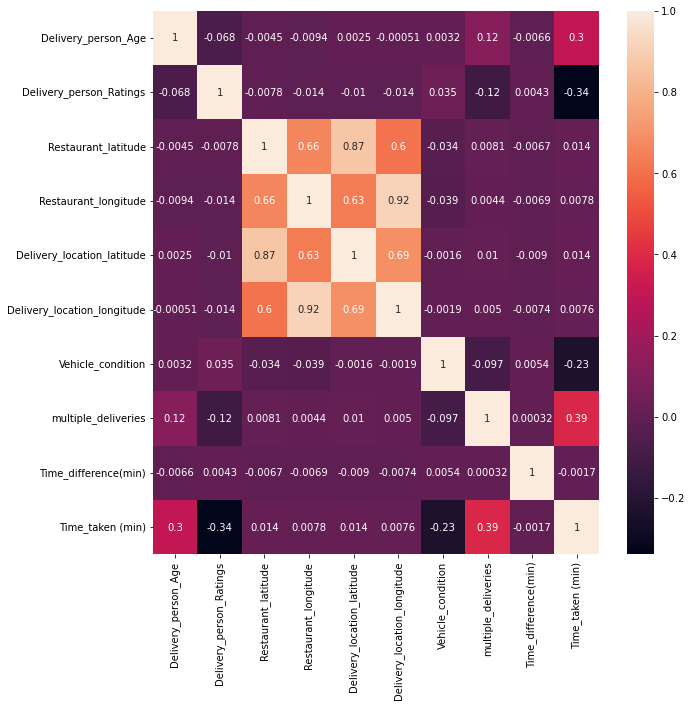

In [626]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(), annot=True)

In [630]:
## as the missing values are less than 5% and missing completely at random
## we will be imputing the missing values with the median 

for i in num_df:
    num_df[i] = num_df[i].fillna(num_df[i].median())

<AxesSubplot:>

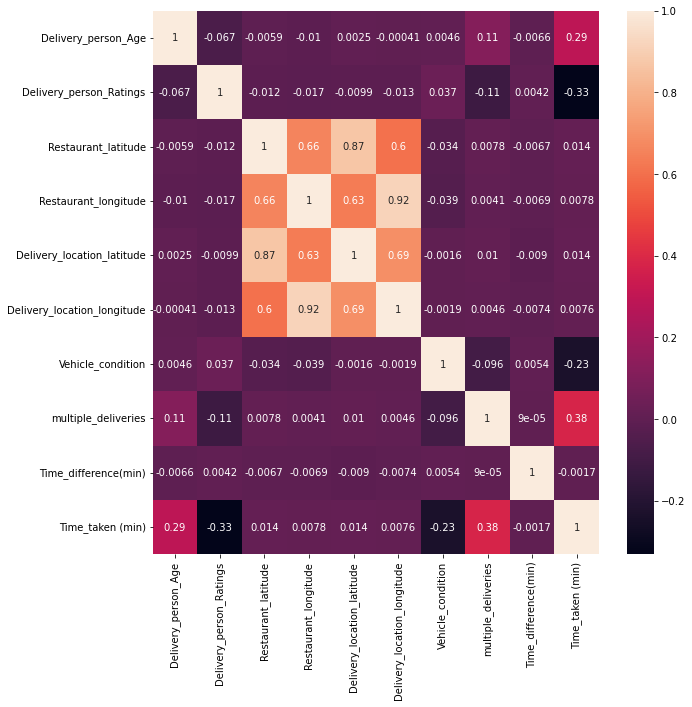

In [631]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(), annot=True)

In [635]:
## As we can see among the independent variables the restaurant_latitude has a strong positive corelation 
## with delivery_loctaion_latitude and the restuarant_longitude has a strong positive corelation with 
## the delivery_location_longitude so, we can drop one of this longitude and latitude

In [636]:
num_df = num_df.drop(columns=["Restaurant_latitude", "Restaurant_longitude"])

In [637]:
for i in num_df.columns:
    print(f'{i}: {num_df[i].isnull().sum()}')

Delivery_person_Age: 0
Delivery_person_Ratings: 0
Delivery_location_latitude: 0
Delivery_location_longitude: 0
Vehicle_condition: 0
multiple_deliveries: 0
Time_difference(min): 0
Time_taken (min): 0


In [634]:
## Now the numerical variables are all set for visualization

<Figure size 720x720 with 0 Axes>

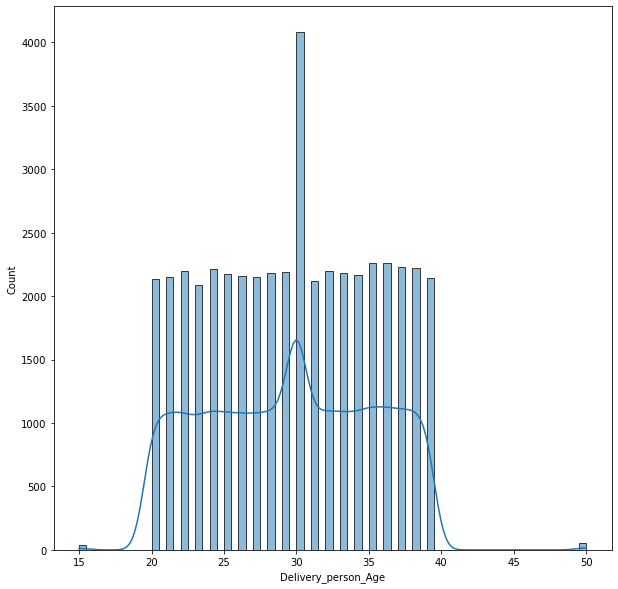

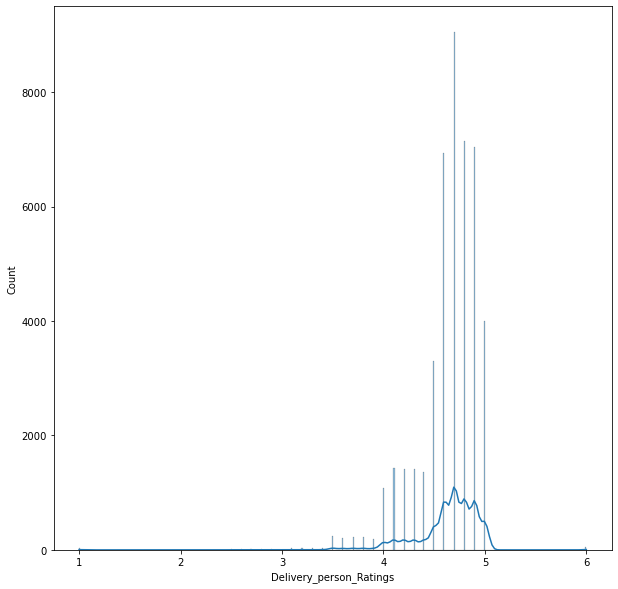

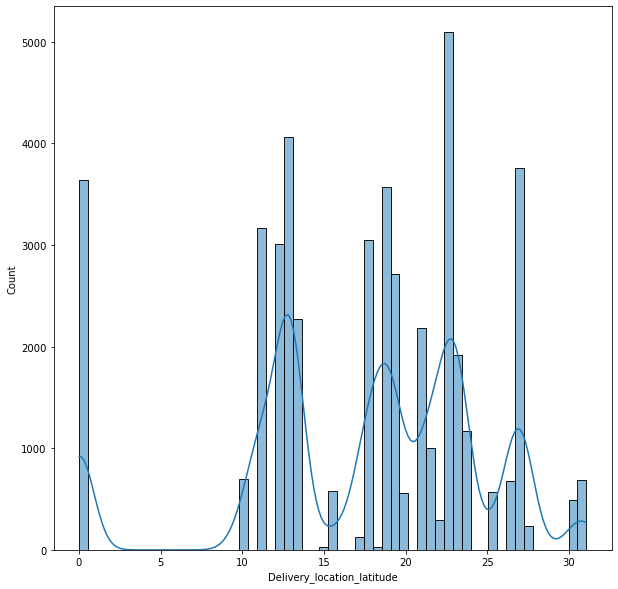

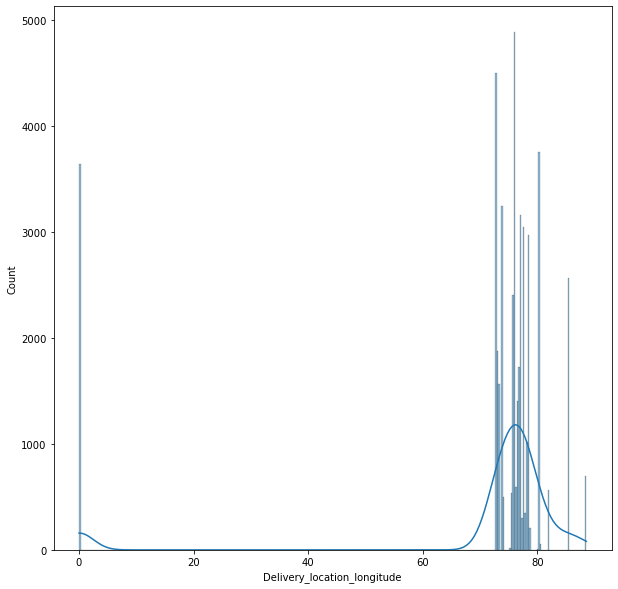

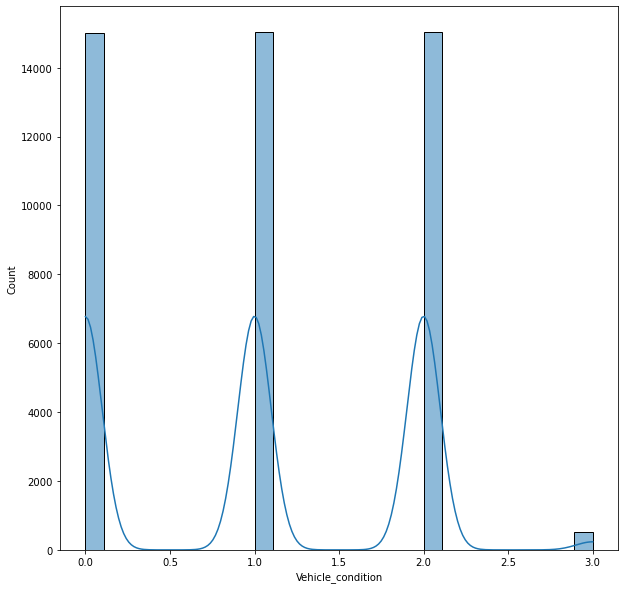

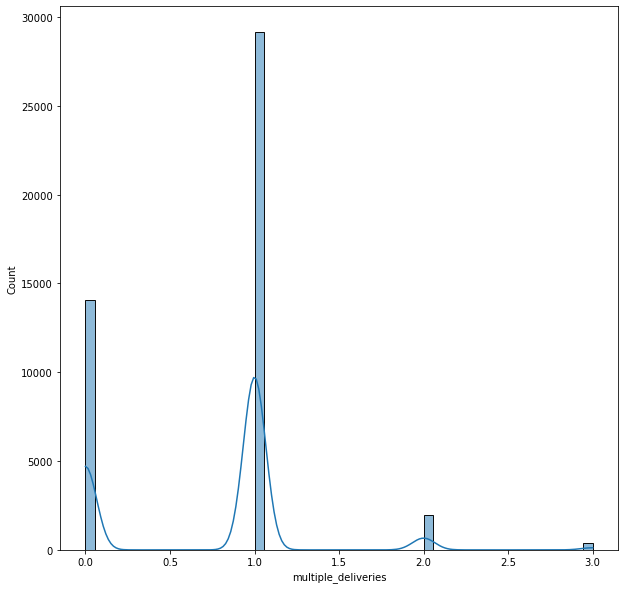

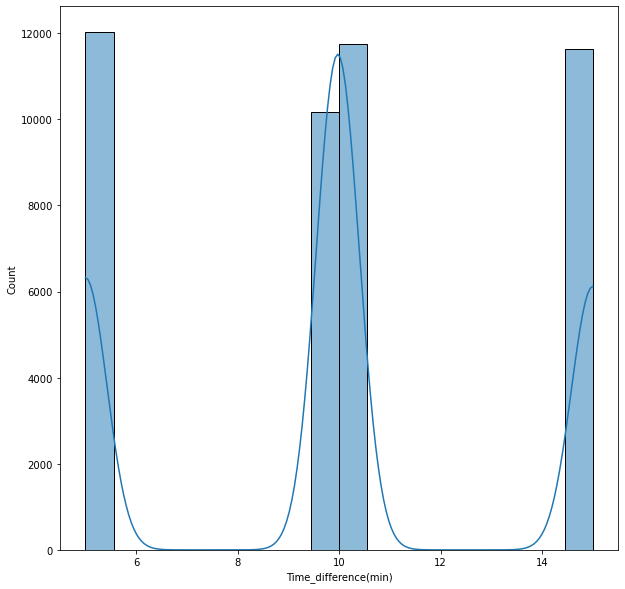

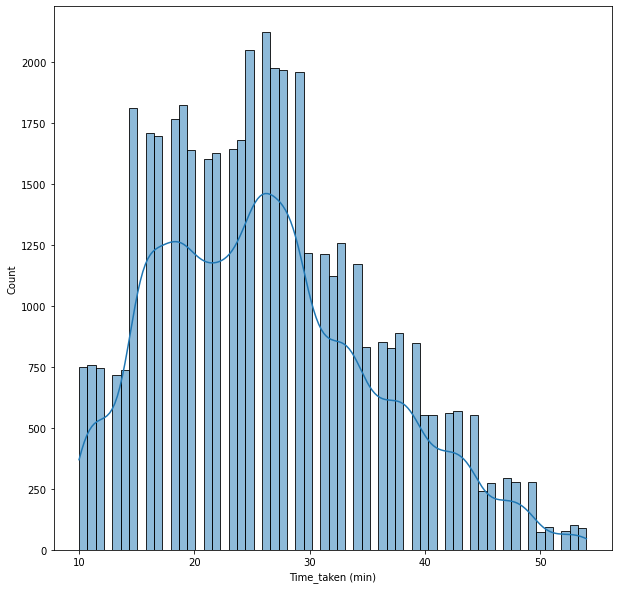

In [640]:
# we can plot the histplot for the numerical variables
plt.figure(figsize=(10, 10))
for i in num_df.columns:
    plt.figure(figsize=(10, 10))
    sns.histplot(data=num_df, x=i, kde=True)
    print("\n")
    plt.show()

<Figure size 1440x720 with 0 Axes>

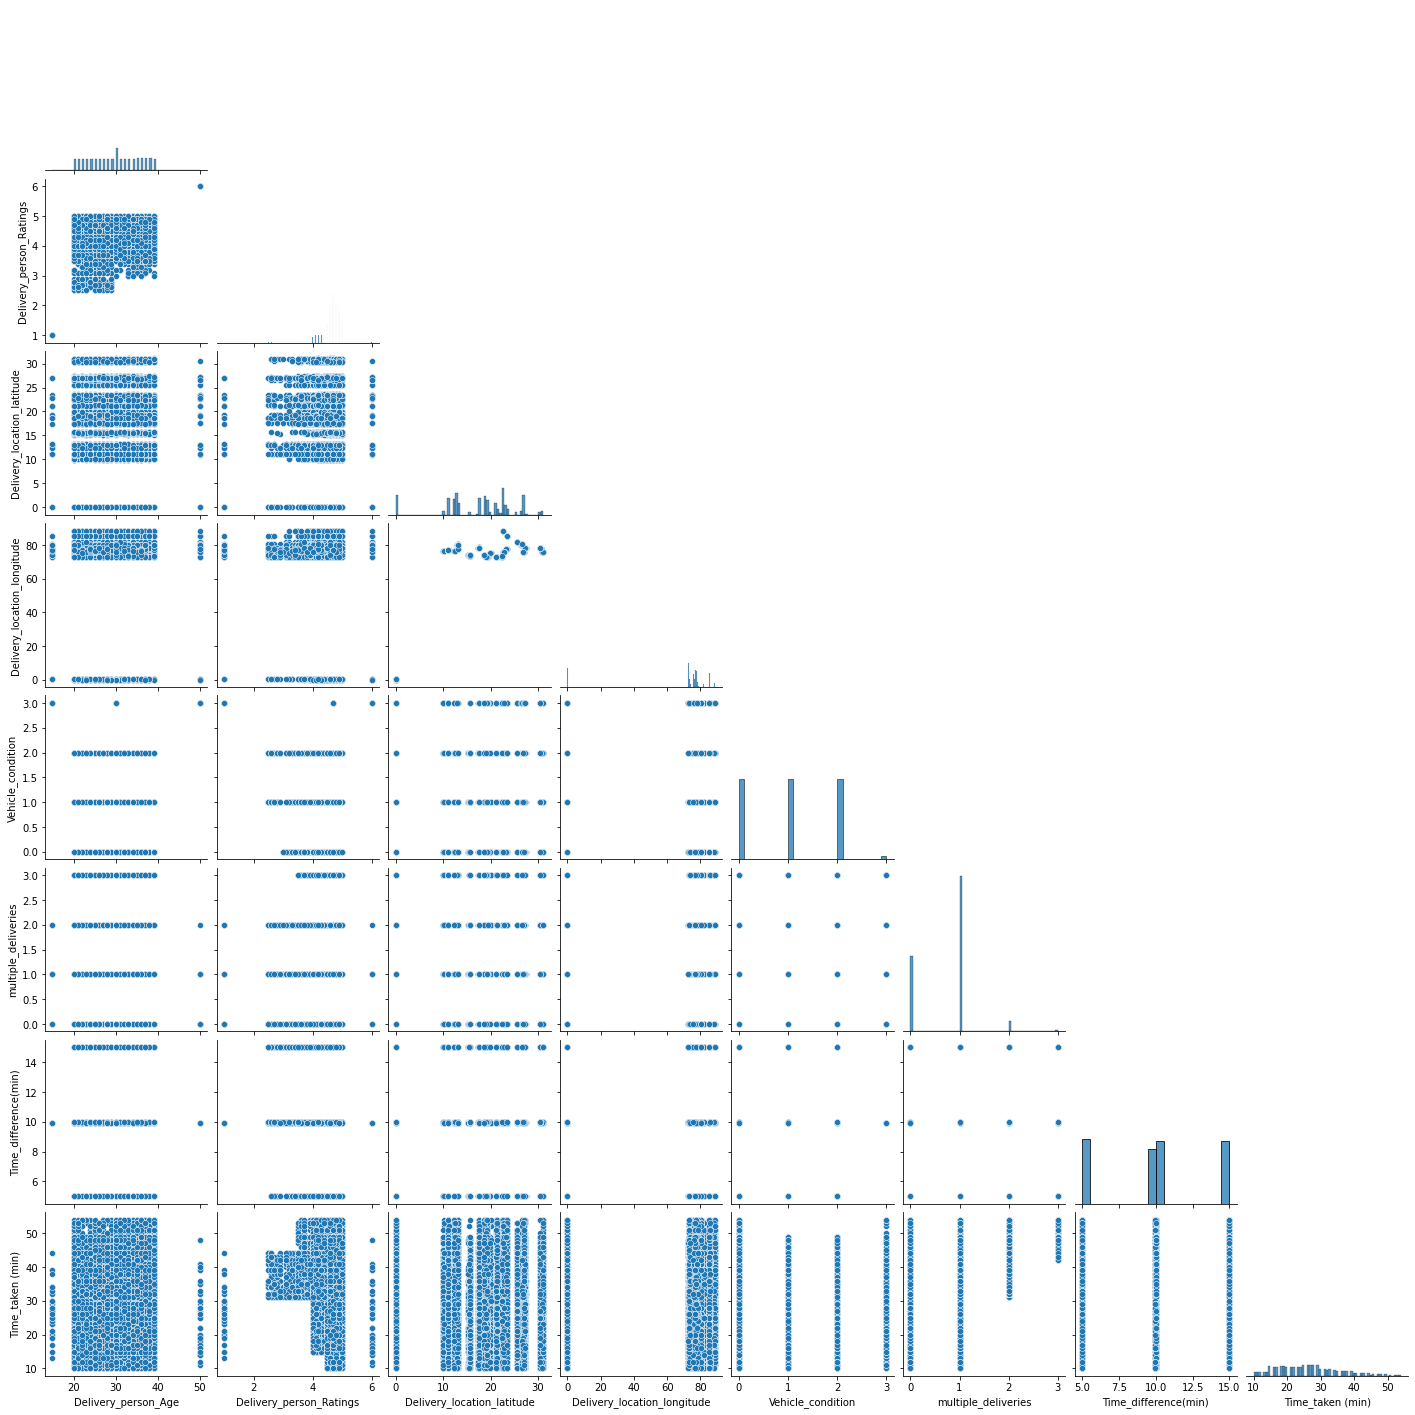

In [659]:
# we can plot the pairplots to visualize more than one variable together
plt.figure(figsize=(20,10))
sns.pairplot(data=num_df, corner=True, palette= any)
plt.show()

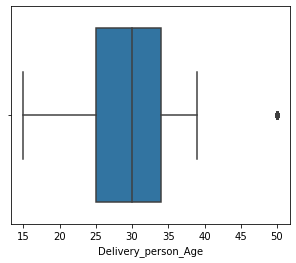

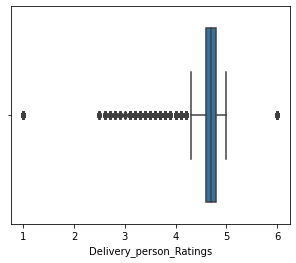

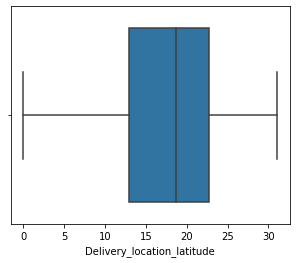

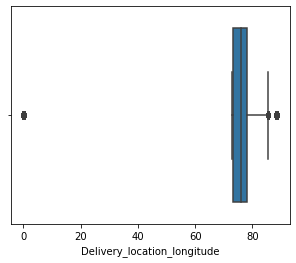

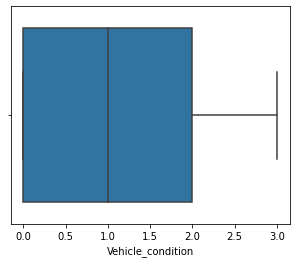

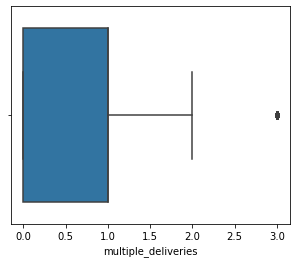

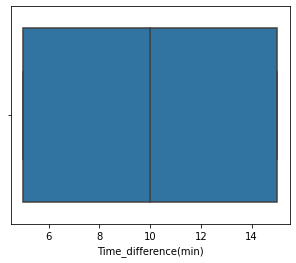

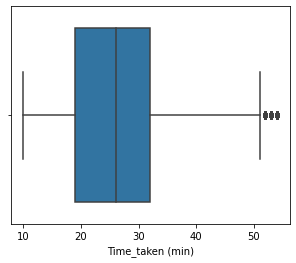

In [645]:
# now we will plot the boxplots for the outlier detection
#plt.figure(figsize=(5, 2))
for i in num_df.columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=num_df, x=i)
    print("\n")
    plt.show()

In [654]:
# deliver person age
# delivery person ratings
# delivery location longitude
# multiple deliveries 
# these four columns are having some outlier value, so we have to remove these outlier values 

## we will use the IQR, to detect how many outliers would be there 
num_df_outliers_removed = pd.DataFrame()
for i in num_df.columns:
    q25, q75 = np.percentile(num_df[i], 25), np.percentile(num_df[i], 75)
    iqr = q75-q25
    cut_off = iqr*1.5
    lower, upper = q25-cut_off, q75+cut_off
    outliers = [x for x in num_df[i] if x<lower or x>upper]    
    print(f'{i} : {len(outliers)}')

Delivery_person_Age : 53
Delivery_person_Ratings : 5345
Delivery_location_latitude : 0
Delivery_location_longitude : 6515
Vehicle_condition : 0
multiple_deliveries : 361
Time_difference(min) : 0
Time_taken (min) : 270


In [655]:
## Lets visualize the categorical features now 

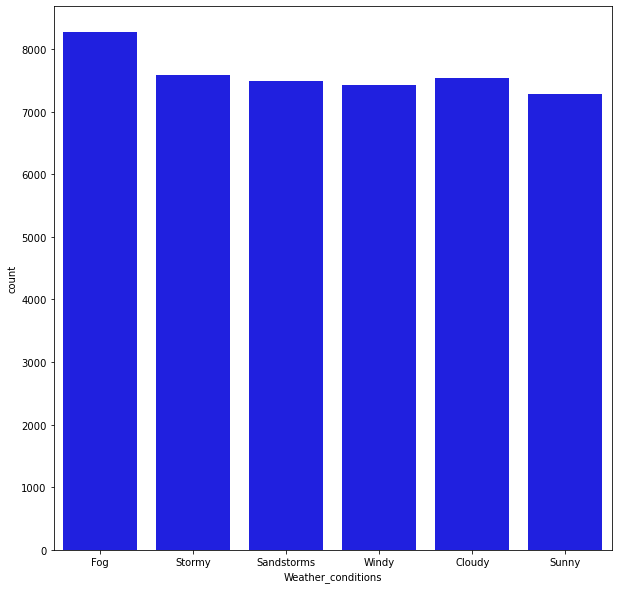

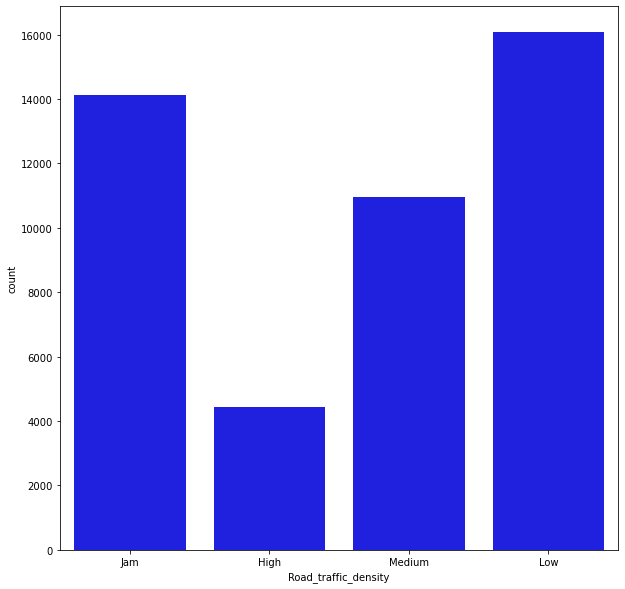

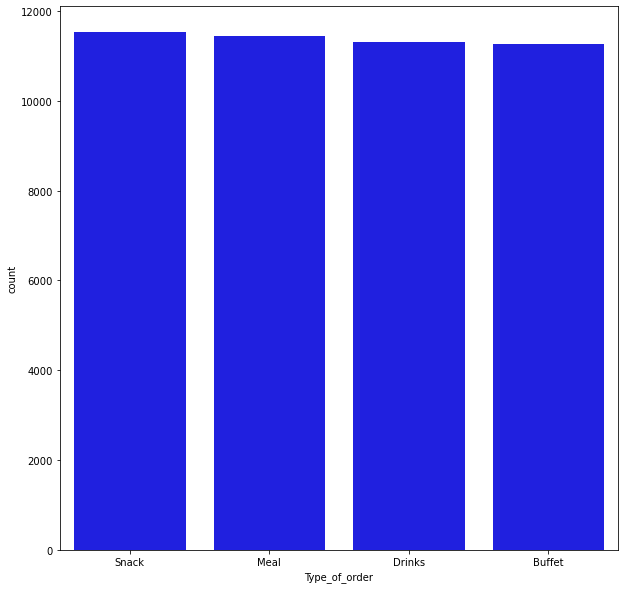

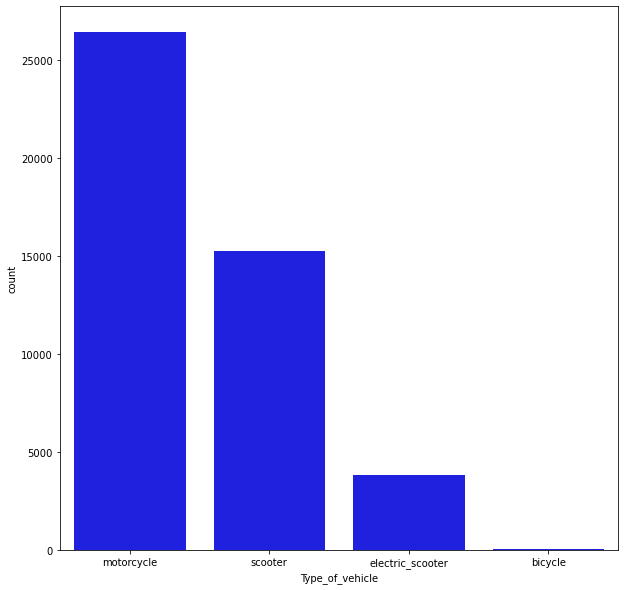

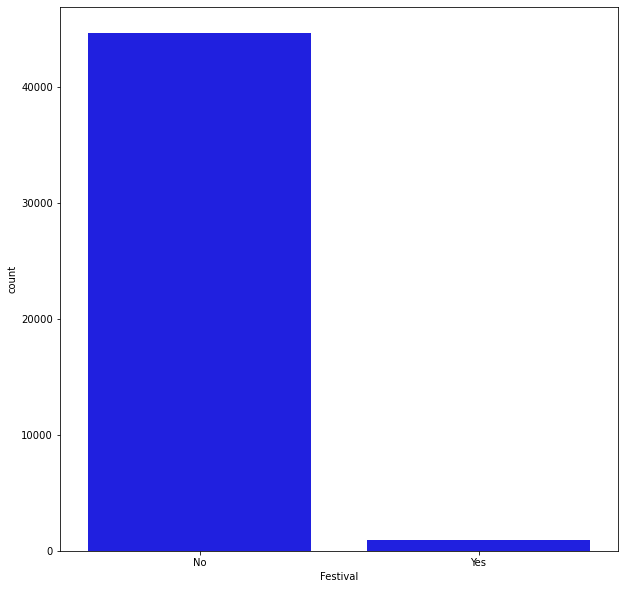

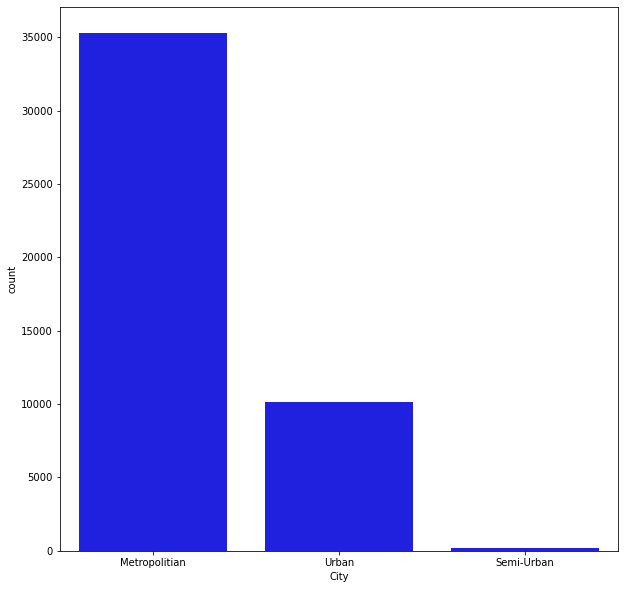

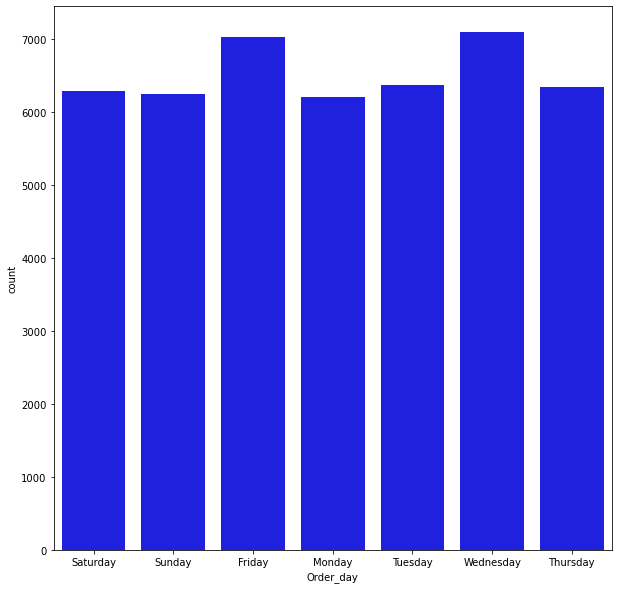

In [662]:
for i in cat_df.columns:
    plt.figure(figsize=(10, 10))
    sns.countplot(x = cat_df[i], color="blue")


In [ ]:
# now we will encode these categorical features 
